# Entanglement Classifier Trial Notebook

### Importing Dependencies

In [1]:
import numpy as np

from classifier.components.system import System
from classifier.components.interaction import InteractionFactory
from classifier.components.model import Model
from classifier.components.interaction_functions import EnergyExchangeFunction

from quantum.core import GeneralQubitMatrixGen

### Setting up the system

In [2]:
reservoir_nodes=4
system_nodes=2

In [3]:
"""
Defining System setup
"""
random_num = np.random.rand()

gen = GeneralQubitMatrixGen()

if random_num >= 0.5:
    system_state = gen.generateState(n_qubits=system_nodes)
elif random_num < 0.5:
    system_state = gen.generateSeparableState(n_qubits=system_nodes)
system_node_list = [0, 1]

if len(system_node_list) != system_nodes:
    raise Exception

#system_interactions = {"system1": DampingFunction(0, system_nodes + reservoir_nodes, 1),
 #                      "system2": DampingFunction(1, system_nodes + reservoir_nodes, 1)}
system_interactions = {}
system = System(
    init_quantum_state=system_state, nodes=system_node_list, interactions=system_interactions
)

### Setting up the interface

In [4]:

"""
Defining Interface setup
"""

interfaceFactory1 = InteractionFactory(EnergyExchangeFunction, coupling_strength=0.5)
interfaceFactory2 = InteractionFactory(EnergyExchangeFunction, coupling_strength=0)

### Setting up the reservoir

In [5]:
"""
Defining Reservoir setup
"""

reservoirFactory1 = InteractionFactory(EnergyExchangeFunction, coupling_strength=[0.5,.8])

### Setting up the model

In [6]:
model = Model()
model.setSystem(system)
model.setReservoirInteractionFacs(dualFactories=[reservoirFactory1], singleFactories=[])
model.setInterfaceInteractionFacs([[interfaceFactory1, interfaceFactory2]])
model.generateReservoir(reservoir_nodes, init_quantum_state=0, interaction_rate=.5)
model.generateInterface(interaction_rate=2)
model.setRunDuration(10)
model.setRunResolution(0.1)
model.setSwitchStructureTime(2)


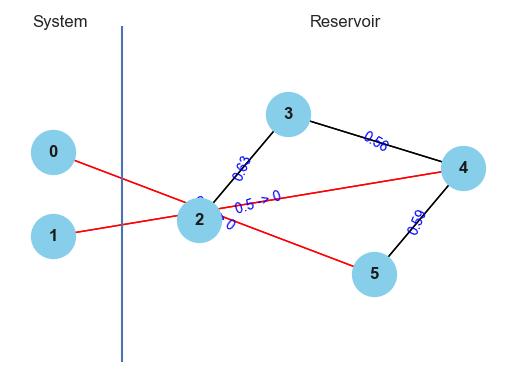

In [7]:
model.draw()

### Running the model

In [8]:
model.setRunResolution(0.1)

In [9]:
model.system.init_quantum_state = system_state
model.run()

In [10]:
a = {'a':5}

In [11]:
b = {'b' : 4}

In [12]:
list(a.values()) + list(b.values())

[5, 4]

In [13]:
log1 = model.modelLog

In [14]:
model.setSwitchStructureTime(10)
model.run()

In [15]:
log2 = model.modelLog

### Plotting results

c:\Users\mmack\anaconda3\envs\qrc\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\mmack\anaconda3\envs\qrc\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


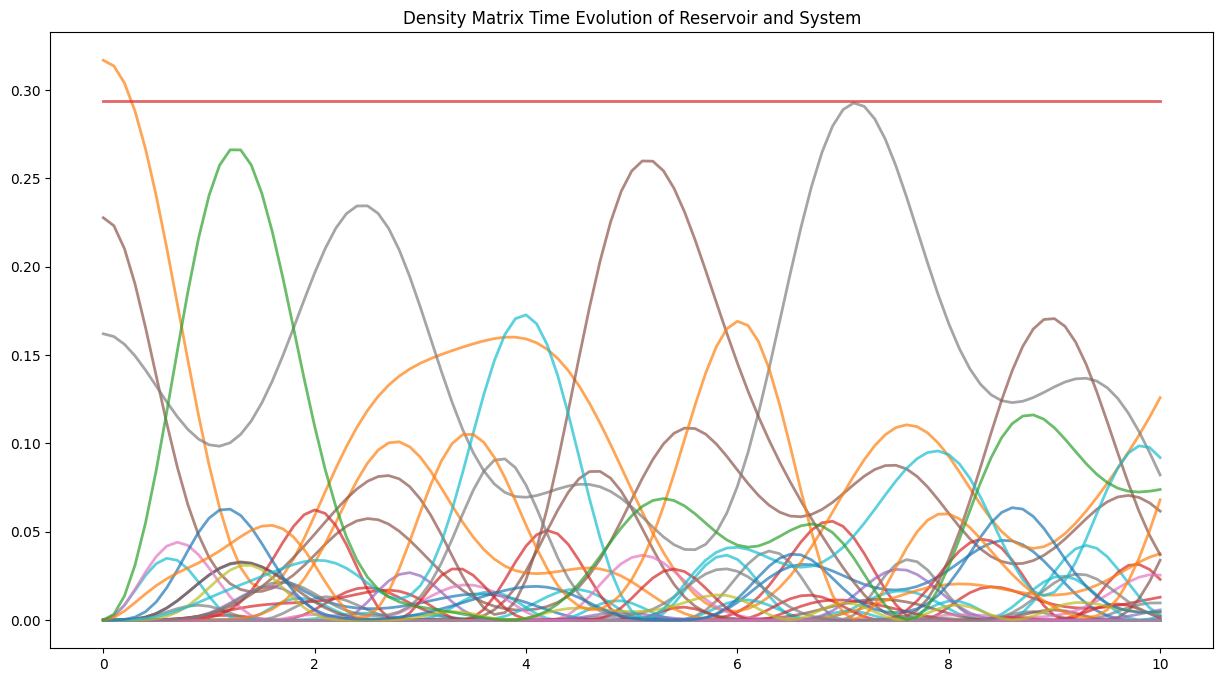

In [16]:
log1.plotResAndSys(legend=False)

c:\Users\mmack\anaconda3\envs\qrc\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\mmack\anaconda3\envs\qrc\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


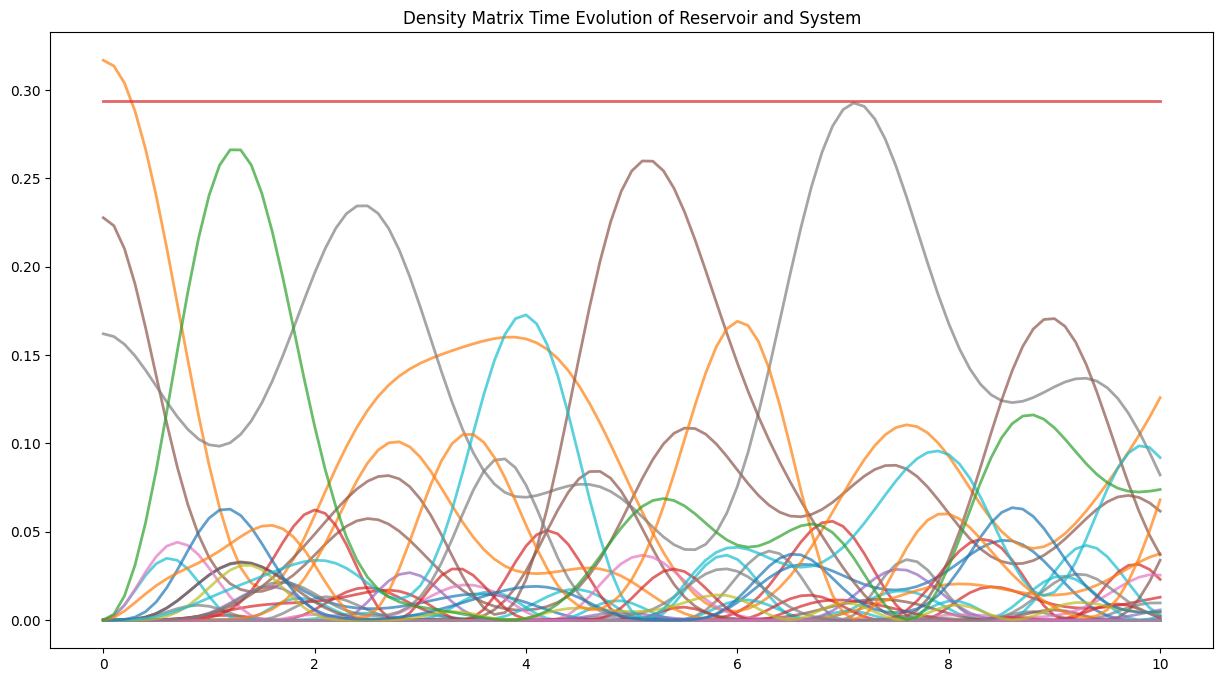

In [17]:
log2.plotResAndSys(legend=False)

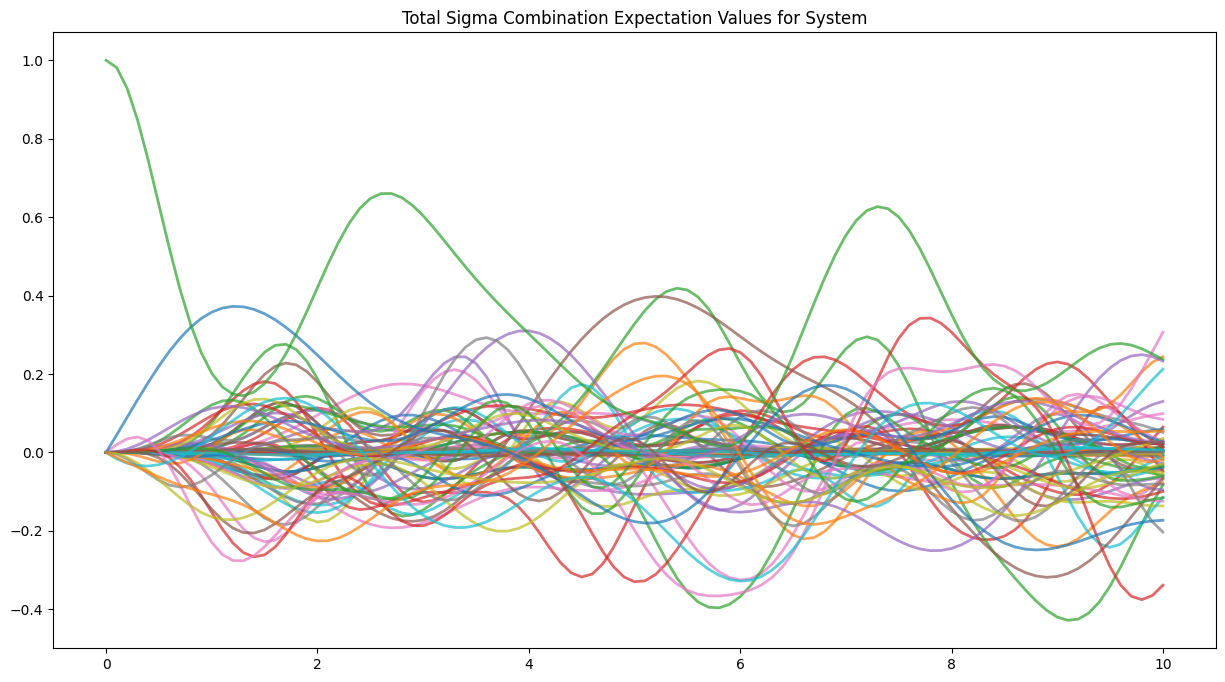

In [18]:
log1.plotSigmaCombinations(legend=False)

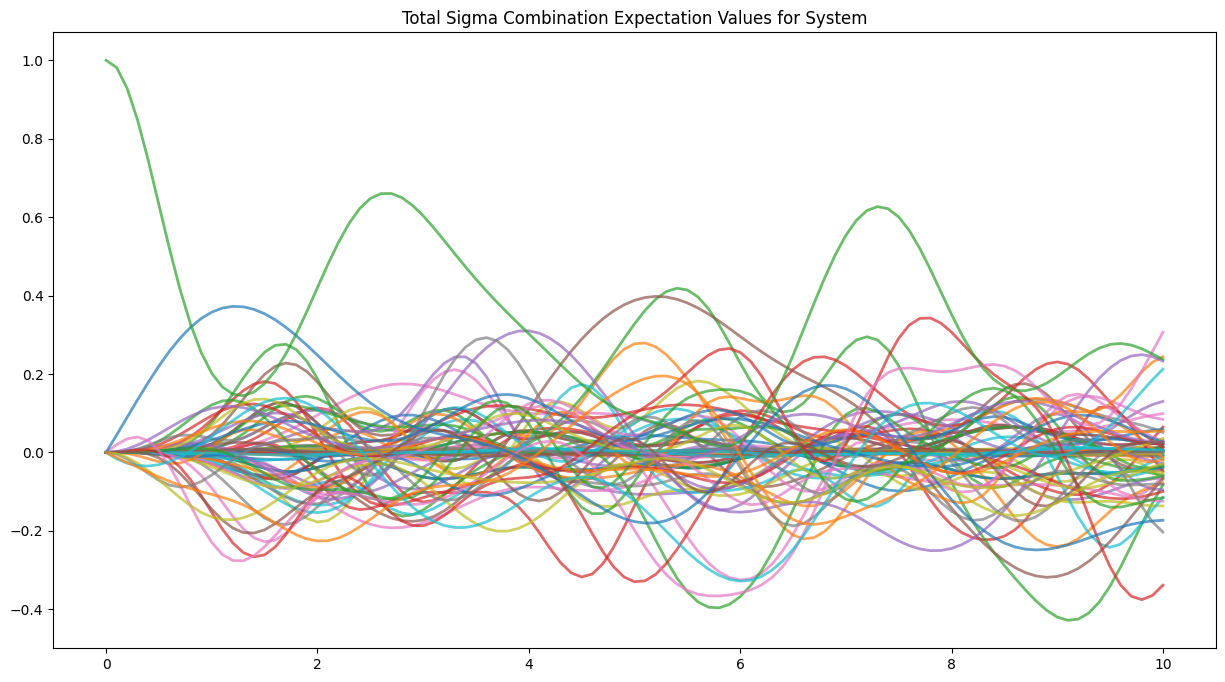

In [19]:
log2.plotSigmaCombinations(legend=False)